# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coeeficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  

Instead we would like to take an interative approach called **gradient descent**.



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of . For the kind of regression problems we've been examining, the resulting plot of loss vs.  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />

We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [ ]:
### Number of Epochs 

Epochs is anoter hyperparamenter you can 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

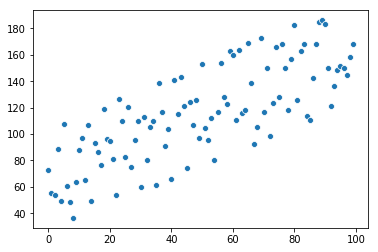

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1122.190627
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 958.876575
[1.90973108 1.67399757]
Iteration 2 | Cost: 885.204384
[1.91281826 1.76783052]
Iteration 3 | Cost: 851.961881
[1.91544065 1.83083814]
Iteration 4 | Cost: 836.953714
[1.9177509  1.87314422]
Iteration 5 | Cost: 830.169478
[1.9198515  1.90154767]
Iteration 6 | Cost: 827.094347
[1.92181129 1.92061444]
Iteration 7 | Cost: 825.692073
[1.92367651 1.93341094]
Iteration 8 | Cost: 825.044281
[1.92547819 1.94199648]
Iteration 9 | Cost: 824.736772
[1.9272372  1.94775403]
Iteration 10 | Cost: 824.582735
[1.92896753 1.95161239]
Iteration 11 | Cost: 824.497917
[1.93067859 1.95419529]
Iteration 12 | Cost: 824.444318
[1.93237669 1.95592162]
Iteration 13 | Cost: 824.404801
[1.93406608 1.95707271]
Iteration 14 | Cost: 824.371635
[1.9357496  1.95783748]
Iteration 15 | Cost: 824.341335
[1.93742917 1.9583428 ]
Iteration 16 | Cost: 824.312328
[1.93910607 1.95867388]
Iteration 17 | Cost: 824.283904
[1.94078116 1.95888796]
I

Iteration 643 | Cost: 807.065556
[2.97885888 1.94372672]
Iteration 644 | Cost: 807.038487
[2.98050399 1.94370192]
Iteration 645 | Cost: 807.011419
[2.98214905 1.94367712]
Iteration 646 | Cost: 806.984352
[2.98379407 1.94365231]
Iteration 647 | Cost: 806.957287
[2.98543905 1.94362751]
Iteration 648 | Cost: 806.930223
[2.98708399 1.94360271]
Iteration 649 | Cost: 806.903160
[2.98872889 1.94357791]
Iteration 650 | Cost: 806.876099
[2.99037374 1.94355312]
Iteration 651 | Cost: 806.849039
[2.99201855 1.94352832]
Iteration 652 | Cost: 806.821980
[2.99366332 1.94350352]
Iteration 653 | Cost: 806.794923
[2.99530805 1.94347872]
Iteration 654 | Cost: 806.767867
[2.99695274 1.94345393]
Iteration 655 | Cost: 806.740813
[2.99859739 1.94342913]
Iteration 656 | Cost: 806.713760
[3.00024199 1.94340434]
Iteration 657 | Cost: 806.686708
[3.00188655 1.94337954]
Iteration 658 | Cost: 806.659658
[3.00353107 1.94335475]
Iteration 659 | Cost: 806.632609
[3.00517555 1.94332996]
Iteration 660 | Cost: 806.60556

Iteration 1166 | Cost: 793.094059
[3.83357626 1.93084054]
Iteration 1167 | Cost: 793.067699
[3.83519968 1.93081606]
Iteration 1168 | Cost: 793.041339
[3.83682306 1.93079159]
Iteration 1169 | Cost: 793.014982
[3.8384464  1.93076711]
Iteration 1170 | Cost: 792.988625
[3.84006969 1.93074264]
Iteration 1171 | Cost: 792.962270
[3.84169295 1.93071817]
Iteration 1172 | Cost: 792.935916
[3.84331616 1.93069369]
Iteration 1173 | Cost: 792.909563
[3.84493933 1.93066922]
Iteration 1174 | Cost: 792.883212
[3.84656246 1.93064475]
Iteration 1175 | Cost: 792.856862
[3.84818555 1.93062028]
Iteration 1176 | Cost: 792.830514
[3.8498086  1.93059581]
Iteration 1177 | Cost: 792.804167
[3.85143161 1.93057134]
Iteration 1178 | Cost: 792.777821
[3.85305458 1.93054687]
Iteration 1179 | Cost: 792.751476
[3.8546775 1.9305224]
Iteration 1180 | Cost: 792.725133
[3.85630039 1.93049794]
Iteration 1181 | Cost: 792.698791
[3.85792323 1.93047347]
Iteration 1182 | Cost: 792.672451
[3.85954603 1.930449  ]
Iteration 1183 |

Iteration 1726 | Cost: 778.539538
[4.73627477 1.91723097]
Iteration 1727 | Cost: 778.513916
[4.73787529 1.91720684]
Iteration 1728 | Cost: 778.488295
[4.73947576 1.91718271]
Iteration 1729 | Cost: 778.462676
[4.7410762  1.91715858]
Iteration 1730 | Cost: 778.437058
[4.74267659 1.91713445]
Iteration 1731 | Cost: 778.411441
[4.74427695 1.91711032]
Iteration 1732 | Cost: 778.385825
[4.74587726 1.91708619]
Iteration 1733 | Cost: 778.360211
[4.74747754 1.91706207]
Iteration 1734 | Cost: 778.334598
[4.74907777 1.91703794]
Iteration 1735 | Cost: 778.308986
[4.75067796 1.91701382]
Iteration 1736 | Cost: 778.283376
[4.75227811 1.91698969]
Iteration 1737 | Cost: 778.257767
[4.75387822 1.91696557]
Iteration 1738 | Cost: 778.232159
[4.75547829 1.91694144]
Iteration 1739 | Cost: 778.206553
[4.75707832 1.91691732]
Iteration 1740 | Cost: 778.180948
[4.75867831 1.9168932 ]
Iteration 1741 | Cost: 778.155344
[4.76027826 1.91686908]
Iteration 1742 | Cost: 778.129741
[4.76187817 1.91684495]
Iteration 1743

Iteration 2297 | Cost: 764.118900
[5.64359353 1.90355174]
Iteration 2298 | Cost: 764.094010
[5.64517103 1.90352795]
Iteration 2299 | Cost: 764.069121
[5.64674848 1.90350417]
Iteration 2300 | Cost: 764.044233
[5.6483259  1.90348039]
Iteration 2301 | Cost: 764.019347
[5.64990328 1.90345661]
Iteration 2302 | Cost: 763.994461
[5.65148061 1.90343283]
Iteration 2303 | Cost: 763.969577
[5.65305791 1.90340905]
Iteration 2304 | Cost: 763.944695
[5.65463517 1.90338527]
Iteration 2305 | Cost: 763.919813
[5.65621239 1.90336149]
Iteration 2306 | Cost: 763.894933
[5.65778956 1.90333771]
Iteration 2307 | Cost: 763.870054
[5.6593667  1.90331393]
Iteration 2308 | Cost: 763.845176
[5.6609438  1.90329015]
Iteration 2309 | Cost: 763.820300
[5.66252085 1.90326638]
Iteration 2310 | Cost: 763.795425
[5.66409787 1.9032426 ]
Iteration 2311 | Cost: 763.770551
[5.66567485 1.90321883]
Iteration 2312 | Cost: 763.745678
[5.66725179 1.90319505]
Iteration 2313 | Cost: 763.720807
[5.66882868 1.90317128]
Iteration 2314

Iteration 2903 | Cost: 749.264541
[6.59225747 1.88924916]
Iteration 2904 | Cost: 749.240405
[6.5938109  1.88922574]
Iteration 2905 | Cost: 749.216269
[6.59536429 1.88920232]
Iteration 2906 | Cost: 749.192135
[6.59691764 1.88917891]
Iteration 2907 | Cost: 749.168002
[6.59847095 1.88915549]
Iteration 2908 | Cost: 749.143871
[6.60002422 1.88913207]
Iteration 2909 | Cost: 749.119740
[6.60157745 1.88910865]
Iteration 2910 | Cost: 749.095611
[6.60313064 1.88908523]
Iteration 2911 | Cost: 749.071483
[6.6046838  1.88906182]
Iteration 2912 | Cost: 749.047356
[6.60623691 1.8890384 ]
Iteration 2913 | Cost: 749.023231
[6.60778999 1.88901499]
Iteration 2914 | Cost: 748.999106
[6.60934302 1.88899157]
Iteration 2915 | Cost: 748.974983
[6.61089601 1.88896816]
Iteration 2916 | Cost: 748.950861
[6.61244897 1.88894475]
Iteration 2917 | Cost: 748.926741
[6.61400189 1.88892133]
Iteration 2918 | Cost: 748.902621
[6.61555476 1.88889792]
Iteration 2919 | Cost: 748.878503
[6.6171076  1.88887451]
Iteration 2920

Iteration 3439 | Cost: 736.501358
[7.41926976 1.87678068]
Iteration 3440 | Cost: 736.477869
[7.42080221 1.87675758]
Iteration 3441 | Cost: 736.454381
[7.42233462 1.87673447]
Iteration 3442 | Cost: 736.430894
[7.42386699 1.87671137]
Iteration 3443 | Cost: 736.407409
[7.42539932 1.87668827]
Iteration 3444 | Cost: 736.383925
[7.42693161 1.87666517]
Iteration 3445 | Cost: 736.360442
[7.42846386 1.87664206]
Iteration 3446 | Cost: 736.336960
[7.42999607 1.87661896]
Iteration 3447 | Cost: 736.313479
[7.43152825 1.87659586]
Iteration 3448 | Cost: 736.290000
[7.43306038 1.87657276]
Iteration 3449 | Cost: 736.266522
[7.43459248 1.87654967]
Iteration 3450 | Cost: 736.243044
[7.43612454 1.87652657]
Iteration 3451 | Cost: 736.219569
[7.43765656 1.87650347]
Iteration 3452 | Cost: 736.196094
[7.43918854 1.87648037]
Iteration 3453 | Cost: 736.172620
[7.44072048 1.87645728]
Iteration 3454 | Cost: 736.149148
[7.44225238 1.87643418]
Iteration 3455 | Cost: 736.125677
[7.44378424 1.87641109]
Iteration 3456

Iteration 3975 | Cost: 724.080631
[8.23511157 1.86448061]
Iteration 3976 | Cost: 724.057772
[8.23662331 1.86445781]
Iteration 3977 | Cost: 724.034914
[8.23813502 1.86443502]
Iteration 3978 | Cost: 724.012058
[8.23964669 1.86441223]
Iteration 3979 | Cost: 723.989203
[8.24115833 1.86438944]
Iteration 3980 | Cost: 723.966349
[8.24266992 1.86436665]
Iteration 3981 | Cost: 723.943496
[8.24418148 1.86434386]
Iteration 3982 | Cost: 723.920644
[8.24569299 1.86432107]
Iteration 3983 | Cost: 723.897794
[8.24720447 1.86429829]
Iteration 3984 | Cost: 723.874944
[8.24871591 1.8642755 ]
Iteration 3985 | Cost: 723.852096
[8.25022732 1.86425271]
Iteration 3986 | Cost: 723.829249
[8.25173868 1.86422993]
Iteration 3987 | Cost: 723.806403
[8.25325001 1.86420714]
Iteration 3988 | Cost: 723.783558
[8.25476129 1.86418436]
Iteration 3989 | Cost: 723.760714
[8.25627254 1.86416157]
Iteration 3990 | Cost: 723.737872
[8.25778375 1.86413879]
Iteration 3991 | Cost: 723.715030
[8.25929493 1.864116  ]
Iteration 3992

Iteration 4501 | Cost: 712.215688
[9.02501839 1.85257154]
Iteration 4502 | Cost: 712.193432
[9.0265101  1.85254905]
Iteration 4503 | Cost: 712.171176
[9.02800177 1.85252656]
Iteration 4504 | Cost: 712.148922
[9.0294934  1.85250408]
Iteration 4505 | Cost: 712.126669
[9.03098499 1.85248159]
Iteration 4506 | Cost: 712.104416
[9.03247655 1.8524591 ]
Iteration 4507 | Cost: 712.082165
[9.03396807 1.85243661]
Iteration 4508 | Cost: 712.059915
[9.03545955 1.85241413]
Iteration 4509 | Cost: 712.037667
[9.03695099 1.85239164]
Iteration 4510 | Cost: 712.015419
[9.03844239 1.85236916]
Iteration 4511 | Cost: 711.993173
[9.03993376 1.85234667]
Iteration 4512 | Cost: 711.970927
[9.04142509 1.85232419]
Iteration 4513 | Cost: 711.948683
[9.04291638 1.8523017 ]
Iteration 4514 | Cost: 711.926440
[9.04440763 1.85227922]
Iteration 4515 | Cost: 711.904198
[9.04589885 1.85225674]
Iteration 4516 | Cost: 711.881957
[9.04739002 1.85223426]
Iteration 4517 | Cost: 711.859717
[9.04888116 1.85221177]
Iteration 4518

Iteration 5038 | Cost: 700.424927
[9.82064284 1.84057628]
Iteration 5039 | Cost: 700.403268
[9.82211436 1.84055409]
Iteration 5040 | Cost: 700.381611
[9.82358585 1.84053191]
Iteration 5041 | Cost: 700.359955
[9.82505729 1.84050972]
Iteration 5042 | Cost: 700.338300
[9.8265287  1.84048754]
Iteration 5043 | Cost: 700.316646
[9.82800007 1.84046536]
Iteration 5044 | Cost: 700.294993
[9.82947141 1.84044317]
Iteration 5045 | Cost: 700.273341
[9.8309427  1.84042099]
Iteration 5046 | Cost: 700.251690
[9.83241396 1.84039881]
Iteration 5047 | Cost: 700.230041
[9.83388519 1.84037663]
Iteration 5048 | Cost: 700.208392
[9.83535637 1.84035445]
Iteration 5049 | Cost: 700.186745
[9.83682752 1.84033227]
Iteration 5050 | Cost: 700.165098
[9.83829863 1.84031009]
Iteration 5051 | Cost: 700.143453
[9.8397697  1.84028791]
Iteration 5052 | Cost: 700.121809
[9.84124074 1.84026573]
Iteration 5053 | Cost: 700.100166
[9.84271174 1.84024355]
Iteration 5054 | Cost: 700.078524
[9.8441827  1.84022138]
Iteration 5055

Iteration 5590 | Cost: 688.635082
[10.6272711   1.82841511]
Iteration 5591 | Cost: 688.614022
[10.62872215  1.82839324]
Iteration 5592 | Cost: 688.592963
[10.63017317  1.82837136]
Iteration 5593 | Cost: 688.571905
[10.63162416  1.82834948]
Iteration 5594 | Cost: 688.550848
[10.6330751   1.82832761]
Iteration 5595 | Cost: 688.529792
[10.63452601  1.82830573]
Iteration 5596 | Cost: 688.508737
[10.63597688  1.82828386]
Iteration 5597 | Cost: 688.487683
[10.63742772  1.82826199]
Iteration 5598 | Cost: 688.466631
[10.63887852  1.82824011]
Iteration 5599 | Cost: 688.445579
[10.64032928  1.82821824]
Iteration 5600 | Cost: 688.424529
[10.64178     1.82819637]
Iteration 5601 | Cost: 688.403479
[10.64323069  1.8281745 ]
Iteration 5602 | Cost: 688.382431
[10.64468134  1.82815263]
Iteration 5603 | Cost: 688.361383
[10.64613195  1.82813076]
Iteration 5604 | Cost: 688.340337
[10.64758253  1.82810889]
Iteration 5605 | Cost: 688.319292
[10.64903307  1.82808702]
Iteration 5606 | Cost: 688.298248
[10.65

[11.40837049  1.81663884]
Iteration 6133 | Cost: 677.355242
[11.40980173  1.81661726]
Iteration 6134 | Cost: 677.334755
[11.41123293  1.81659568]
Iteration 6135 | Cost: 677.314268
[11.41266409  1.8165741 ]
Iteration 6136 | Cost: 677.293782
[11.41409522  1.81655253]
Iteration 6137 | Cost: 677.273297
[11.41552632  1.81653095]
Iteration 6138 | Cost: 677.252814
[11.41695737  1.81650937]
Iteration 6139 | Cost: 677.232331
[11.41838839  1.8164878 ]
Iteration 6140 | Cost: 677.211850
[11.41981938  1.81646623]
Iteration 6141 | Cost: 677.191369
[11.42125033  1.81644465]
Iteration 6142 | Cost: 677.170890
[11.42268124  1.81642308]
Iteration 6143 | Cost: 677.150411
[11.42411211  1.81640151]
Iteration 6144 | Cost: 677.129934
[11.42554295  1.81637993]
Iteration 6145 | Cost: 677.109458
[11.42697376  1.81635836]
Iteration 6146 | Cost: 677.088982
[11.42840452  1.81633679]
Iteration 6147 | Cost: 677.068508
[11.42983525  1.81631522]
Iteration 6148 | Cost: 677.048035
[11.43126595  1.81629365]
Iteration 6149

Iteration 6692 | Cost: 666.063183
[12.20420722  1.80464037]
Iteration 6693 | Cost: 666.043269
[12.20561826  1.8046191 ]
Iteration 6694 | Cost: 666.023355
[12.20702927  1.80459782]
Iteration 6695 | Cost: 666.003442
[12.20844025  1.80457655]
Iteration 6696 | Cost: 665.983530
[12.20985119  1.80455528]
Iteration 6697 | Cost: 665.963619
[12.21126209  1.80453401]
Iteration 6698 | Cost: 665.943710
[12.21267296  1.80451274]
Iteration 6699 | Cost: 665.923801
[12.21408379  1.80449146]
Iteration 6700 | Cost: 665.903893
[12.21549459  1.8044702 ]
Iteration 6701 | Cost: 665.883986
[12.21690535  1.80444893]
Iteration 6702 | Cost: 665.864081
[12.21831608  1.80442766]
Iteration 6703 | Cost: 665.844176
[12.21972677  1.80440639]
Iteration 6704 | Cost: 665.824272
[12.22113742  1.80438512]
Iteration 6705 | Cost: 665.804370
[12.22254804  1.80436385]
Iteration 6706 | Cost: 665.784468
[12.22395862  1.80434259]
Iteration 6707 | Cost: 665.764567
[12.22536917  1.80432132]
Iteration 6708 | Cost: 665.744668
[12.22

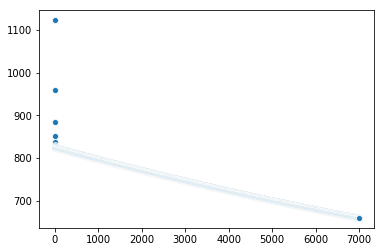

In [6]:
numEpochs= 7000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500 />

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise